In [30]:
import pandas as pd

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
#file = 'D:\datafile\hsif_roll_data.xlsx'

In [22]:
#df = pd.read_excel(file, index_col='Date').dropna()
import pandas_datareader.data as web
import datetime as dt

stock = '^dji'
start = '1987-01-01'
end = dt.datetime.today()

df = web.DataReader(stock,'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-28,25494.240234,24681.009766,25270.830078,25409.359375,915990000,25409.359375
2020-03-02,26706.169922,25391.960938,25590.509766,26703.320312,637200000,26703.320312
2020-03-03,27084.589844,25706.279297,26762.470703,25917.410156,647080000,25917.410156
2020-03-04,27102.339844,26286.310547,26383.679688,27090.859375,457590000,27090.859375
2020-03-05,26671.919922,25943.330078,26671.919922,26121.279297,477370000,26121.279297


In [24]:
df.drop(['Close'], axis=1, inplace=True)
df.tail()

,High,Low,Open,Volume,Adj Close
Date,,,,,
2020-02-28,25494.240234,24681.009766,25270.830078,915990000,25409.359375
2020-03-02,26706.169922,25391.960938,25590.509766,637200000,26703.320312
2020-03-03,27084.589844,25706.279297,26762.470703,647080000,25917.410156
2020-03-04,27102.339844,26286.310547,26383.679688,457590000,27090.859375
2020-03-05,26671.919922,25943.330078,26671.919922,477370000,26121.279297


In [27]:
df.rename(columns={'Adj Close':'Close'},inplace=True)
# mav_vol = df['Volume'].rolling(window=20).mean()
df.tail()

,High,Low,Open,Volume,Close
Date,,,,,
2020-02-28,25494.240234,24681.009766,25270.830078,915990000,25409.359375
2020-03-02,26706.169922,25391.960938,25590.509766,637200000,26703.320312
2020-03-03,27084.589844,25706.279297,26762.470703,647080000,25917.410156
2020-03-04,27102.339844,26286.310547,26383.679688,457590000,27090.859375
2020-03-05,26671.919922,25943.330078,26671.919922,477370000,26121.279297


In [28]:
from matplotlib import pyplot as plt 

'''testing plotting with Chinese'''
import matplotlib.font_manager as mfm

# font_path = r'c:\\Windows\fonts\kaiu.ttf'
font_path=r'c:\\WINDOWS\FONTS\DENG.TTF'
prop = mfm.FontProperties(fname=font_path)
# end

In [51]:
import datetime as dt

# period_start = pd.to_datetime(df.index[0]).strftime('%Y-%m-%d')
period_start = '2020-01-01'
period_end = dt.datetime.today().strftime('%Y-%m-%d')
period = (df.index>=period_start) & (df.index<=period_end)
lastday = pd.to_datetime(df.index[-2]).strftime('%Y-%m-%d')


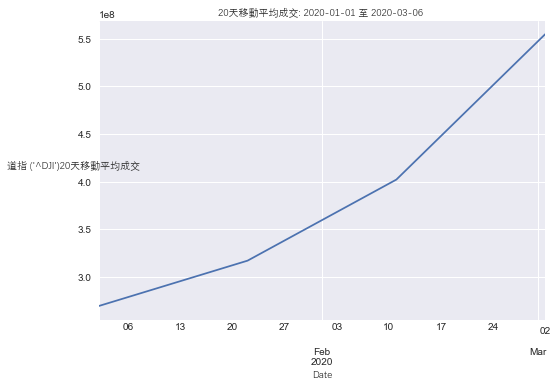

In [52]:
stock_name = "道指 ('^DJI')"

plt.style.use('seaborn')
plt.figure()

#20-day moving average:
mav_vol = df['Volume'].rolling(window=20).mean()

#stock_name 20-day moving average volumne plotting details
plt.subplot()
display_mav_vol_name = '20天移動平均成交'
# plt.xlabel('')
plt.xlabel('日期',FontProperties=prop)
plt.ylabel(f'{stock_name}{display_mav_vol_name}', rotation =0, FontProperties=prop)
plt.title(f"{display_mav_vol_name}: {period_start} 至 {period_end} ", FontProperties=prop) 
mav_vol_print1 = df.loc[period,'Volume'].resample('20D').mean().plot()


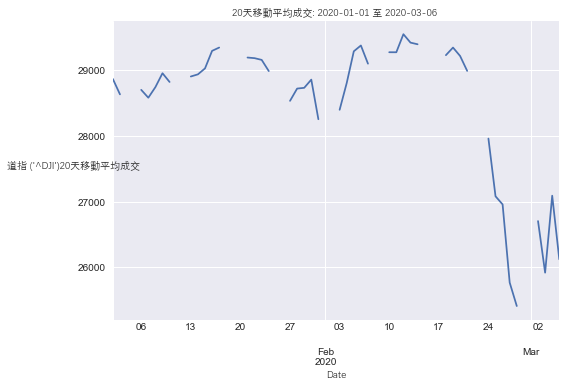

In [53]:
#stock_name 20-day moving average volumne plotting details
plt.subplot()
display_close_name = '收市價'
# plt.xlabel('')
plt.xlabel('日期',FontProperties=prop)
plt.ylabel(f'{stock_name}{display_mav_vol_name}', rotation =0, FontProperties=prop)
plt.title(f"{display_mav_vol_name}: {period_start} 至 {period_end} ", FontProperties=prop) 
mav_vol_print1 = df.loc[period,'Close'].resample('1D').mean().plot()
